Data from https://www.kaggle.com/arjunbhasin2013/ccdata

Data description:

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import collections
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6490,C16668,136.268319,1.000000,757.49,487.61,269.88,1360.553696,1.000000,0.083333,0.916667,0.583333,10,26,2000.0,4086.277963,1723.818986,0.500000,12
4729,C14858,1512.218864,1.000000,1002.93,825.89,177.04,0.000000,1.000000,0.833333,0.333333,0.000000,0,23,4000.0,328.446221,344.205824,0.000000,12
1475,C11524,2550.528085,1.000000,0.00,0.00,0.00,3155.857852,0.000000,0.000000,0.000000,0.800000,17,0,3000.0,674.847656,616.794193,0.000000,10
1823,C11883,396.667584,1.000000,2559.41,2469.41,90.00,0.000000,0.500000,0.333333,0.166667,0.000000,0,8,4000.0,827.889811,188.185292,0.000000,12
1522,C11573,8281.348085,1.000000,4231.12,3101.11,1130.01,0.000000,1.000000,1.000000,0.583333,0.000000,0,43,10500.0,2856.165405,2046.341231,0.000000,12
7559,C17763,27.931382,0.500000,169.40,0.00,169.40,0.000000,0.400000,0.000000,0.200000,0.000000,0,5,1500.0,116.255235,145.094293,0.000000,10
2055,C12119,3433.295973,1.000000,4342.07,4247.87,94.20,0.000000,0.833333,0.666667,0.166667,0.000000,0,20,11000.0,3903.861413,806.987100,0.000000,12
3395,C13492,1158.783497,1.000000,183.00,183.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,1200.0,271.548882,355.227627,0.000000,12
5876,C16041,26.960540,0.636364,157.45,0.00,157.45,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,1000.0,238.253379,116.450584,0.000000,12
7727,C17935,65.915182,0.727273,840.00,0.00,840.00,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1000.0,1014.023858,185.815051,0.857143,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


(array([6482.,  502.,  358.,  179.,  153.,  268.,  125.,  128.,  155.,
         600.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

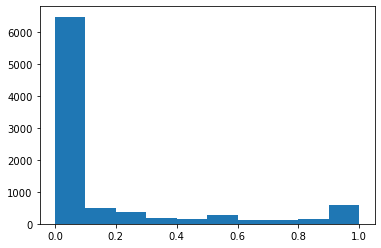

In [6]:
y = df['PRC_FULL_PAYMENT'].copy()
df.drop(['CUST_ID', 'PRC_FULL_PAYMENT'], axis = 1, inplace = True)
plt.hist(y)

In [7]:
df.isnull().any(axis=0)

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
TENURE                              False
dtype: bool

There are nan values in CREDIT_LIMIT and MINIMUM_PAYMENTS, from the description we simply fill it by 0

In [8]:
df.fillna(0, inplace = True)

In [9]:
def plot_all_num(df, num_names, l = 4,  fsize = (18, 15), stepfill = False):
    h = len(num_names) // l if len(num_names) % l == 0 else len(num_names) // l + 1
    f, ax = plt.subplots(h, l, figsize = fsize, squeeze=False)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            if idx >= len(num_names):
                break
            num_name = num_names[idx]
            cnt = collections.Counter(df[num_name])
            key_num = len(cnt)
            if not stepfill:
                ax[i][j].hist(df[num_name], bins = min(50, key_num))
            else:
                ax[i][j].hist(df[num_name], bins = min(50, key_num), histtype="stepfilled")
            ax[i][j].set_title(num_names[idx])
    return f

In [10]:
names = df.columns.tolist()

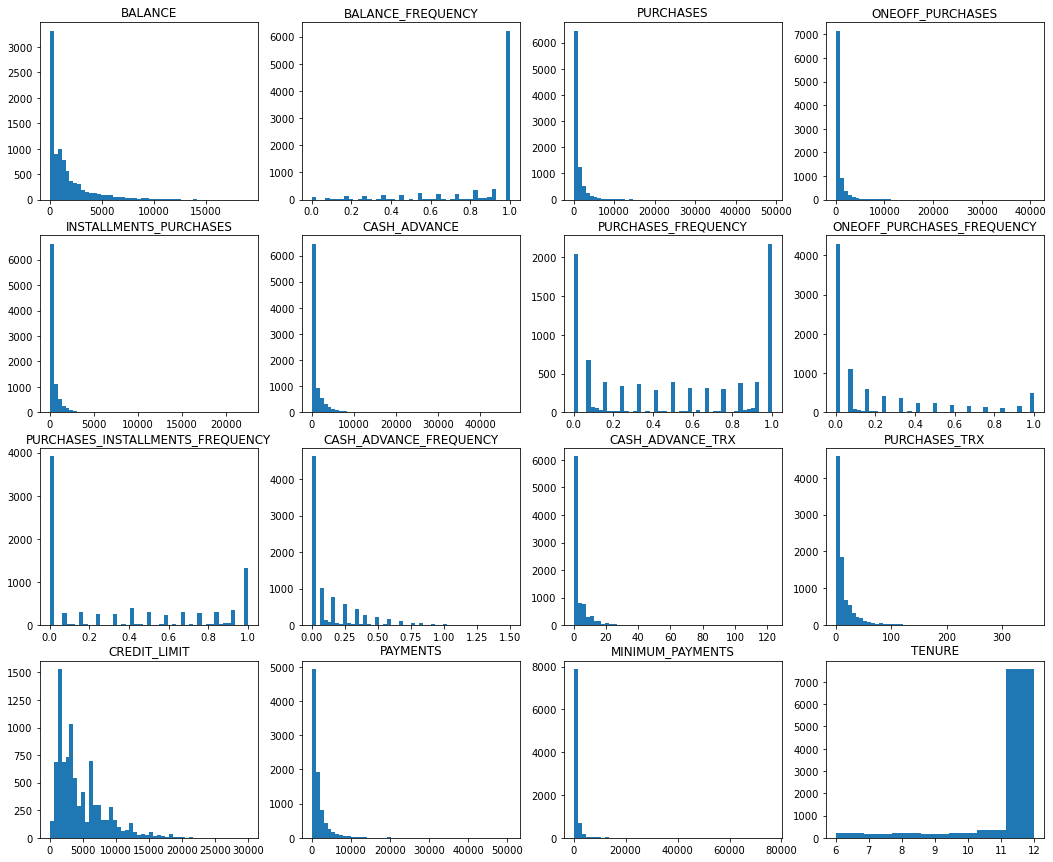

In [11]:
num_figs = plot_all_num(df, names)

It seems that there is a large difference between values in right tail, and the values in mainstream. Standardization is better than normalization in this kind of data

In [12]:
df_scaled = (df-df.mean())/(df.std())  

<AxesSubplot:>

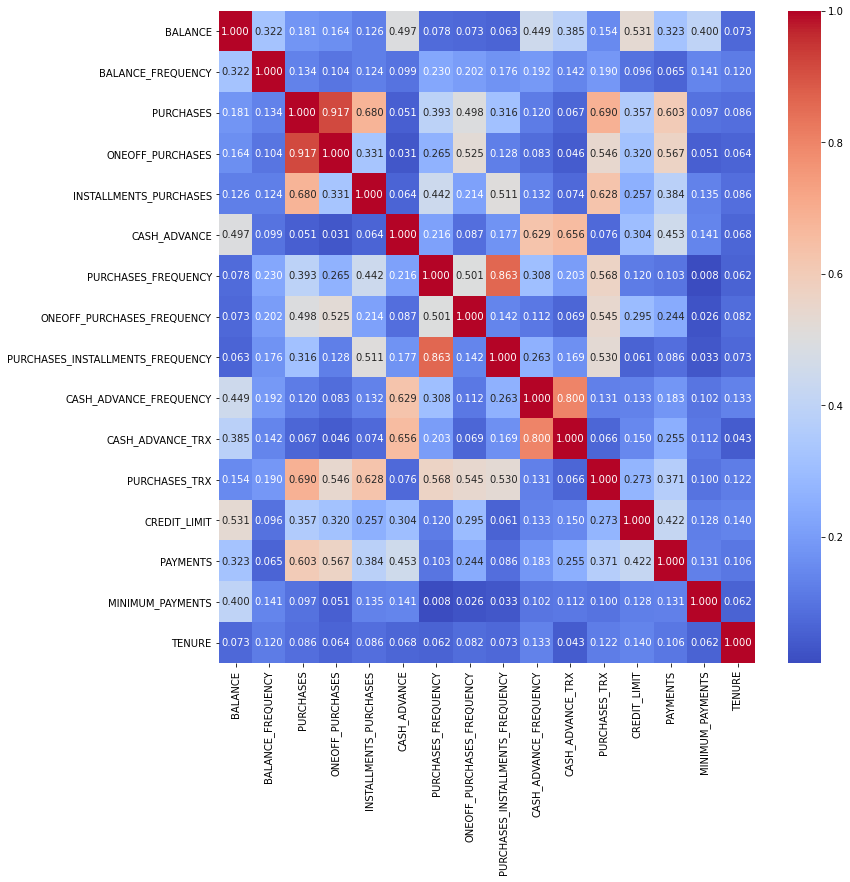

In [13]:
plt.figure(figsize = (12, 12))
corrs = df_scaled.loc[: ,names].corr().abs()
sns.heatmap(corrs, annot = True, fmt = '.3f', cmap = 'coolwarm')

In [14]:
relation_dict = dict()
for colname in corrs.columns:
    for rowname in corrs.index:
        pair = tuple(sorted([colname, rowname]))
        if pair not in relation_dict and corrs[colname][rowname] > 0.8 and colname != rowname:
            relation_dict[pair] = corrs[colname][rowname]
for key, val in relation_dict.items():
    print(str(key) + ':' + str(val))

('ONEOFF_PURCHASES', 'PURCHASES'):0.916844558715255
('PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'):0.8629336372699696


In [15]:
import statistics as st

In [16]:
for k in relation_dict:
    a, b = k
    for attr in [a, b]:
        cor = corrs[attr]
        mean = st.mean(cor)
        mid = st.median(cor)
        print(attr + ": mean " + str(mean) + " | median " + str(mid))
    print("************************")

ONEOFF_PURCHASES: mean 0.32135759103744604 | median 0.21464347800595268
PURCHASES: mean 0.38691135173902524 | median 0.33627990253416173
************************
PURCHASES_FREQUENCY: mean 0.3350657267544971 | median 0.24732638791310202
PURCHASES_INSTALLMENTS_FREQUENCY: mean 0.2869691116160435 | median 0.17264340698822445
************************


In [17]:
df_scaled.drop(['PURCHASES', 'PURCHASES_FREQUENCY'], axis = 1, inplace = True)

In [18]:
df_scaled.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
TENURE                              float64
dtype: object

All data in df ar float64 so we can use Kmeans without error now.

In [19]:
from sklearn.cluster import KMeans

In [20]:

def distEclud(vecA, vecB):
    """
    eculdian distance between two vecs
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    calculate sse
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(data_train)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("Cluster: ",num , "| SSE: ", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(df_scaled)

Cluster:  2 | SSE:  106040.02080243283
Cluster:  3 | SSE:  91063.2552425207
Cluster:  4 | SSE:  83694.72096067699
Cluster:  5 | SSE:  77007.86209986586
Cluster:  6 | SSE:  70874.92186018432
Cluster:  7 | SSE:  65262.05594026831
Cluster:  8 | SSE:  60597.89156227963
Cluster:  9 | SSE:  57177.66275056703


In [21]:
n = 3
estimator = KMeans(n_clusters=n)
estimator.fit(df_scaled)
label_pred = estimator.labels_
centers = estimator.cluster_centers_
df['cluster'] = label_pred

In [22]:
full_payment_dict = collections.defaultdict(list)
# y: PRC_FULL_PAYMENT
for i in range(len(y)):
    full_payment_dict[label_pred[i]].append(y[i])

In [23]:
max_len = max(len(v) for v in full_payment_dict.values())
for k in full_payment_dict:
    full_payment_dict[k] += [None] * (max_len - len(full_payment_dict[k]))

In [24]:
df2 = pd.DataFrame(full_payment_dict)
df2.describe()

,1,2,0
count,6297.000000,1449.000000,1204.000000
mean,0.155951,0.038084,0.281177
std,0.291818,0.107973,0.379920
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.166667,0.000000,0.583333
max,1.000000,1.000000,1.000000


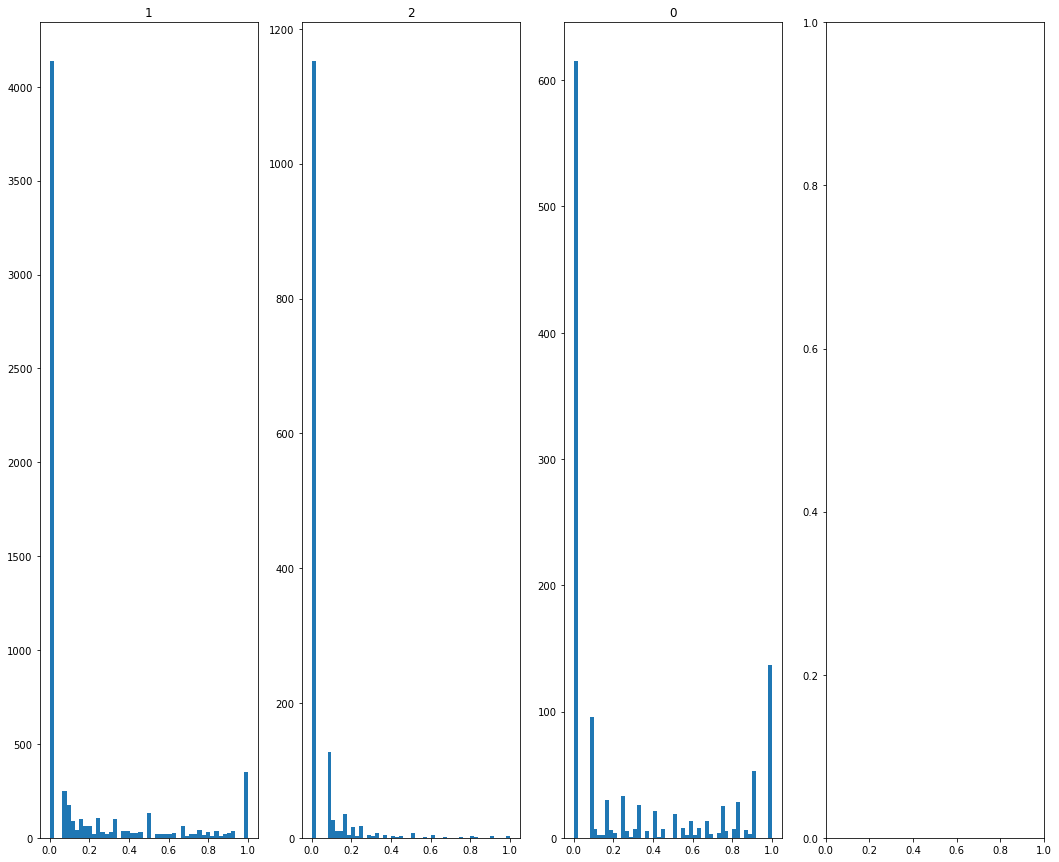

In [25]:
cnts = plot_all_num(df2, list(full_payment_dict.keys()))

In [26]:
rank = []
for data in y:
    if 0 <= data < 0.1:
        rank.append(0)
    elif 0.1 <= data < 0.3:
        rank.append(1)
    elif 0.3 <= data < 0.6:
        rank.append(2)
    elif 0.6 <= data < 0.9:
        rank.append(3)
    else:
        rank.append(4)
df['rank'] = rank

In [27]:
clusters = [[0] * 5 for _ in range(n)]
for i in range(len(df)):
    for item in range(n):
        for rk in range(5):
            if df['cluster'][i] == item and df['rank'][i] == rk:
                clusters[item][rk] += 1
print(clusters)

[[711, 90, 109, 104, 190], [4491, 604, 474, 323, 405], [1280, 126, 29, 9, 5]]


In [28]:
transposed = list(zip(*clusters))
print(transposed)

[(711, 4491, 1280), (90, 604, 126), (109, 474, 29), (104, 323, 9), (190, 405, 5)]


In [33]:
def plot_pies(ls, fsize = (18, 15)):
    f, ax = plt.subplots(1, len(ls), figsize = fsize, squeeze=False)
    for i in range(len(ls)):
        vals = ls[i]
        plt_label = i
        labels = ['cluster' + str(_) for _ in range(len(ls[i]))]
        ax[0][i].pie(vals, labels=labels, autopct='%1.0f%%',shadow=False, startangle=170)
        ax[0][i].set_title(plt_label)
    return f

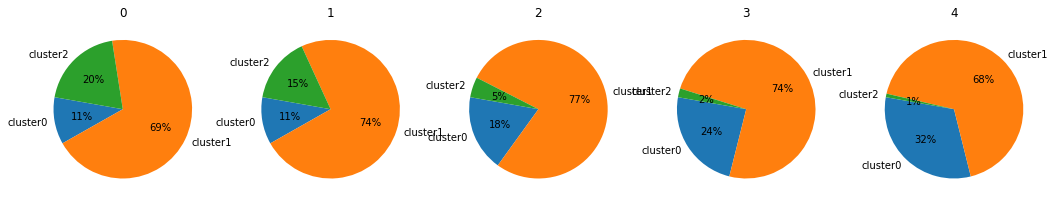

In [34]:
f = plot_pies(transposed)